In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [25]:
dataset = pd.read_csv(r'C:\Users\Asus\Desktop\Herst doc\AML\diabetes.csv')
dataset

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [26]:
l1=LabelEncoder()
dataset["outcome"]=l1.fit_transform(dataset["outcome"])
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [27]:
# Apply PCA for dimensionality reduction (reduce to 2D)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

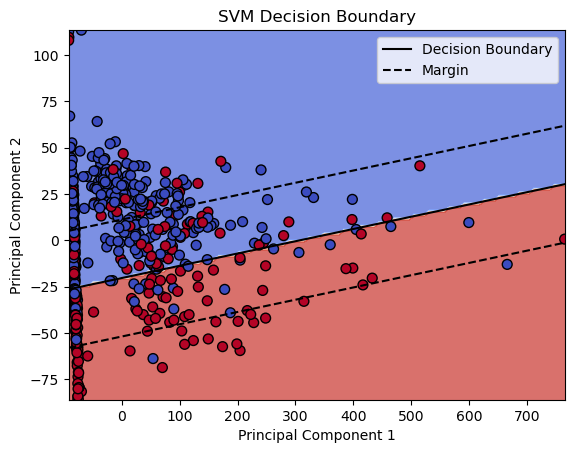

In [28]:
# Fit the SVM classifier
sv = SVC(kernel='linear', random_state=10)
sv.fit(X_train_pca, Y_train)

# Create a meshgrid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100),
                     np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 100))

# Predict for each point in the meshgrid
Z = sv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', edgecolors='k', s=50)

# Plot the hyperplane and margins
w = sv.coef_[0]  # Extract weight vector
b = sv.intercept_[0]  # Extract bias
x_min, x_max = X_train_pca[:, 0].min(), X_train_pca[:, 0].max()
x_vals = np.linspace(x_min, x_max, 100)

# Decision boundary: w[0]*x + w[1]*y + b = 0 --> y = (-w[0]*x - b) / w[1]
decision_boundary = -(w[0] * x_vals + b) / w[1]

# Margins: y = (-w[0]*x - b + 1) / w[1] and y = (-w[0]*x - b - 1) / w[1]
margin_1 = -(w[0] * x_vals + b - 1) / w[1]
margin_2 = -(w[0] * x_vals + b + 1) / w[1]

plt.plot(x_vals, decision_boundary, 'k-', label='Decision Boundary')
plt.plot(x_vals, margin_1, 'k--', label='Margin')
plt.plot(x_vals, margin_2, 'k--')



plt.title('SVM Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [29]:
sv = SVC( kernel='linear',random_state=10)
sv.fit(X_train, Y_train)

SVC(kernel='linear', random_state=10)

In [30]:
y_pred = sv.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[97 10]
 [18 29]]


In [32]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred)*100
ac

81.81818181818183